# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wether or not someone has a heart disease based on their medica attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data

The original data came from Cleveland data from the UCI Machine Learning Repository. 

There is also a version of it available on [Kaggle](https://www.kaggle.com/c/heart-disease-uci/overview/description).

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether ot not a patient has heart disease during the proof of concept, we will pursue the project.



## 4. Features


### 4.1 Features description



This is where you will get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create a data dictionary**

1. **age**: Age in years.
2. **sex**: The gender of the patient. (1 = male, 0 = female).
3. **cp**: Type of chest pain.
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
 
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. **chol**: Serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. **restecg**: Resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * Can range from mild symptoms to severe problems
        * Signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. **thalach**: Maximum heart rate achieved
9. **exang**: Exercise induced angina (1 = yes, 0 = no).
10. **oldpeak**: ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11. **slope**: The slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. **ca**: Number of major vessels (0-3) colored by flourosopy
    * Colored vessel means the doctor can see the blood passing through
    * The more blood movement the better (no clots)
13. **thal**: Thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. **target**: 1 or 0

### 4.2. Importing our tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### 4.3. Exploring the data

Let's check how many samples we have

In [4]:
len(data)

303

Checking for any missing values

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Cool! No missing at all

### 4.4. Exploratory Data Analysis

Let's divide our features in categorical and numerical values:

* Categorical:
    * sex
    * cp
    * fbs
    * restecg
    * exang
    * slope
    * ca
    * thal


* Numerical:
    * age
    * trestbps
    * chol
    * thalach
    * oldpeak

In [6]:
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

Before going any further we must know what is the class distribution that we have in our data.

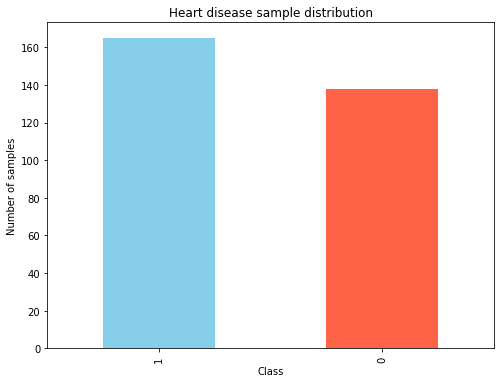

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
data["target"].value_counts().plot(kind="bar",
                                   color=["skyblue", "tomato"],
                                   ax=ax)

ax.set(title="Heart disease sample distribution",
       xlabel="Class",
       ylabel="Number of samples");

The above chart shows a fair balanced dataset. However in the modelling stage we will account for the slight class imbalance that is present.

Now let's visualize the relation between the categorical features and the target:

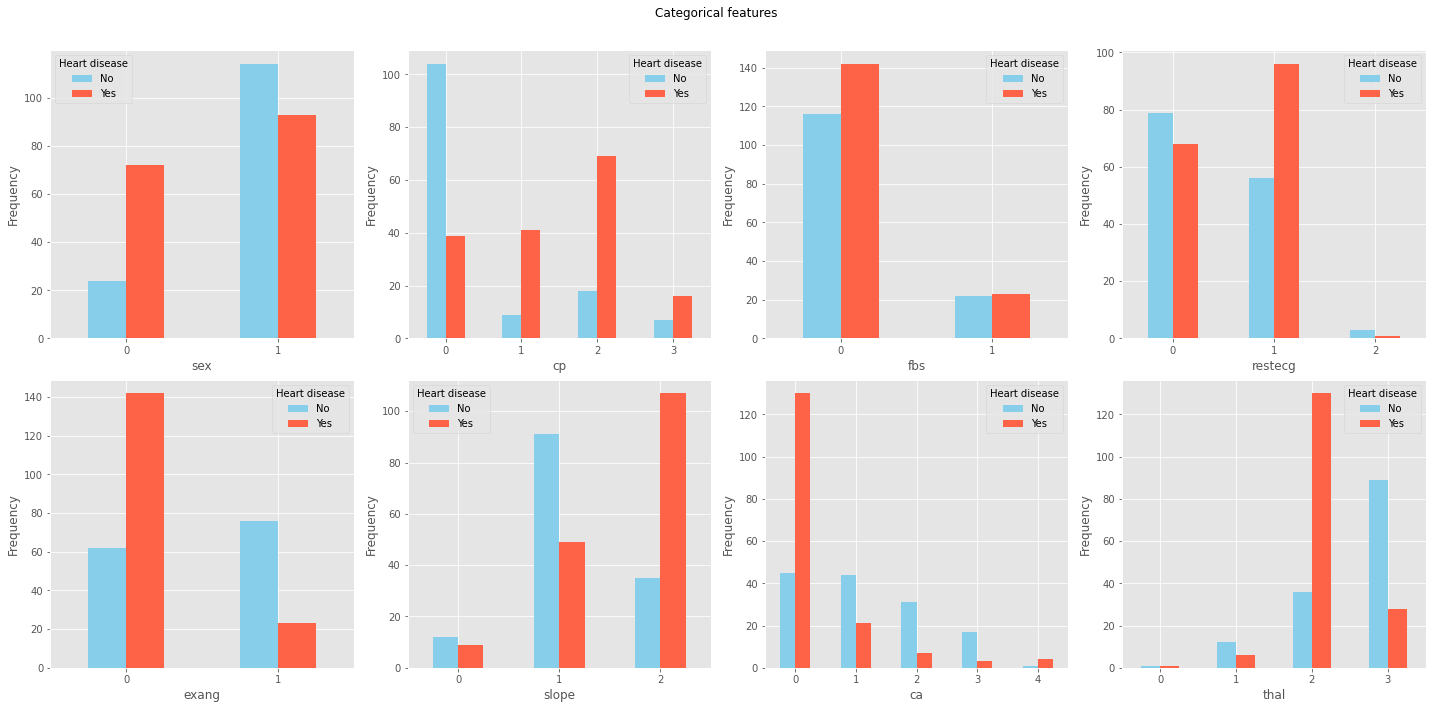

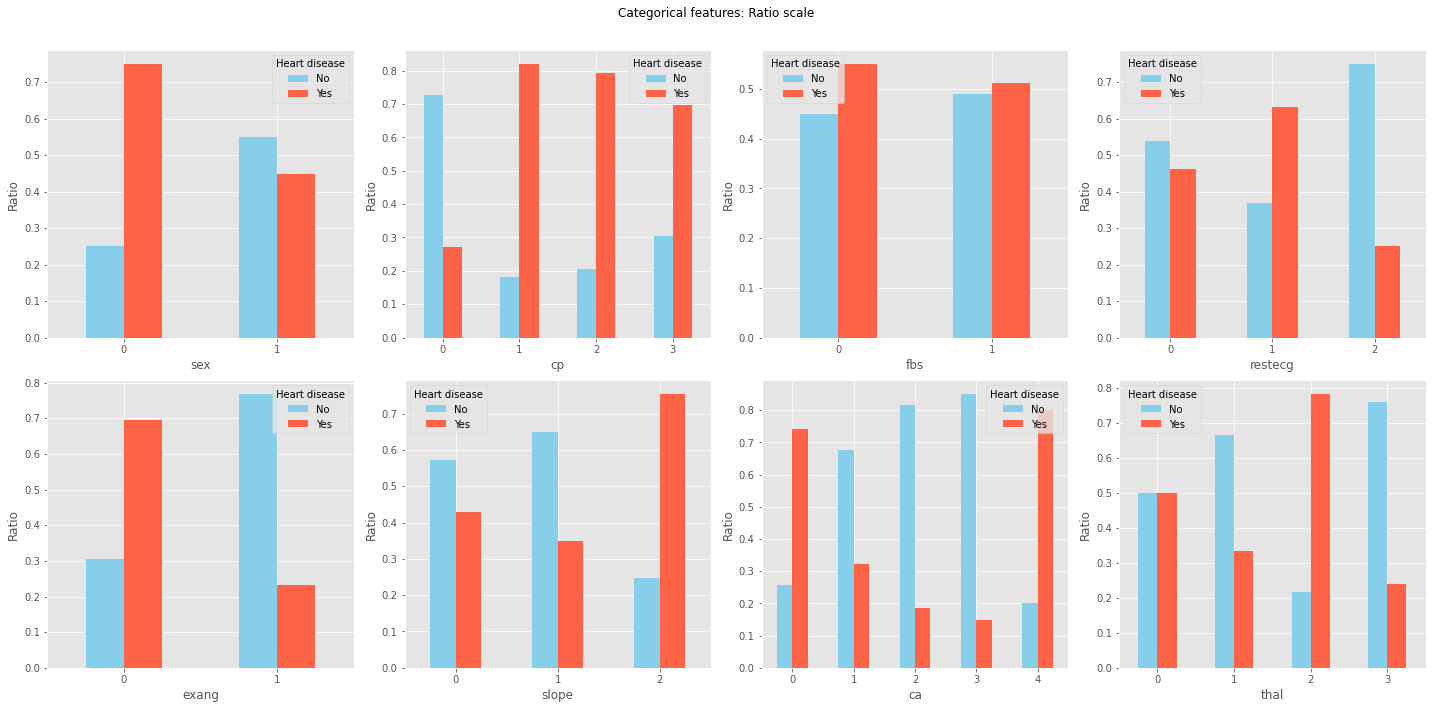

In [8]:
plt.style.use("ggplot")

fig = plt.figure(figsize=(20,10))

for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    sub = fig.add_subplot(2, 4, i + 1)
    pd.crosstab(data[column],data["target"]).plot(kind="bar", 
                                                  color= ["skyblue", "tomato"], 
                                                  ax=sub, 
                                                  ylabel="Frequency")
    sub.legend(["No","Yes"],
            title="Heart disease" 
            )                                           
    plt.xticks(rotation=0)
    

plt.tight_layout(h_pad=1.0)
plt.subplots_adjust(top=0.92)
fig.suptitle("Categorical features");

fig1 = plt.figure(figsize=(20,10))

for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    sub = fig1.add_subplot(2, 4, i + 1)
    normalized = pd.crosstab(data["target"],data[column])/pd.crosstab(data["target"],data[column]).sum()
    normalized.T.plot(kind="bar",
                      color= ["skyblue", "tomato"], 
                      ax=sub,
                      ylabel="Ratio")
    sub.legend(["No","Yes"],
                title="Heart disease" 
                ) 
    plt.xticks(rotation=0)

plt.tight_layout(h_pad=1.0)
plt.subplots_adjust(top=0.92)
fig1.suptitle("Categorical features: Ratio scale");

The findings with these charts are very interesting. Here are some of them:
* According to the data, 3 out of 4 women have a heart disease, whilst for men the ratio goes down about 2 out of 4.
* Chest pain of 1 and above seem to be a strong indicator of heart disease.
* Diabetes seems not to be related to heart disease.
* For the resting electrocardiographic results, 1 out of 3 subjects that present a ST-T Wave abnormality have the disease; whilst 1 out of 4 subjects that present a possible or definite left ventricular hypertrophy have the disease.
* Subjects that presented an exercise induced angina are less likely to have the disease that those who did not.
* If the slope of the peak exercise ST segment is downsloping there is a high chance the subject has the disease.
* The number of major vessels seems to be negatively correlated with the presence of heart disease. However, for a number of major vessels equal to 4 the chances of having the disease raise abruptly. 
This last claim may be misleading as `ca` is supossed to be in a 0-3 range.
* For the thalium stress result looks like there is another mismatch between the data and the feature dictionary that we have. Supossing that 1=Normal. 2=Fixed defect and 3=Reversable defect, for a subject with a fixed defect it is very likely to have a heart disease. Whilst for someone with a reversable defect the chances of having heart disease drop.


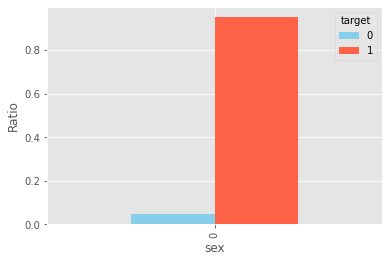

In [9]:
data_t = data[(data["sex"] == 0) & (data["exang"] == 0) & (data["slope"] == 2)]
normalized = pd.crosstab(data_t["target"],data_t["sex"])/pd.crosstab(data_t["target"],data_t["sex"]).sum()
normalized.T.plot(kind="bar",
                    color= ["skyblue", "tomato"], 
                    ylabel="Ratio");

For women that did not experienced exercise induced angina and that for their peak exercise ST segment the slope is downsloping there is a very high chance they have heart disease (~95%).

Now let's visualize the relation between the numerical features and the target:

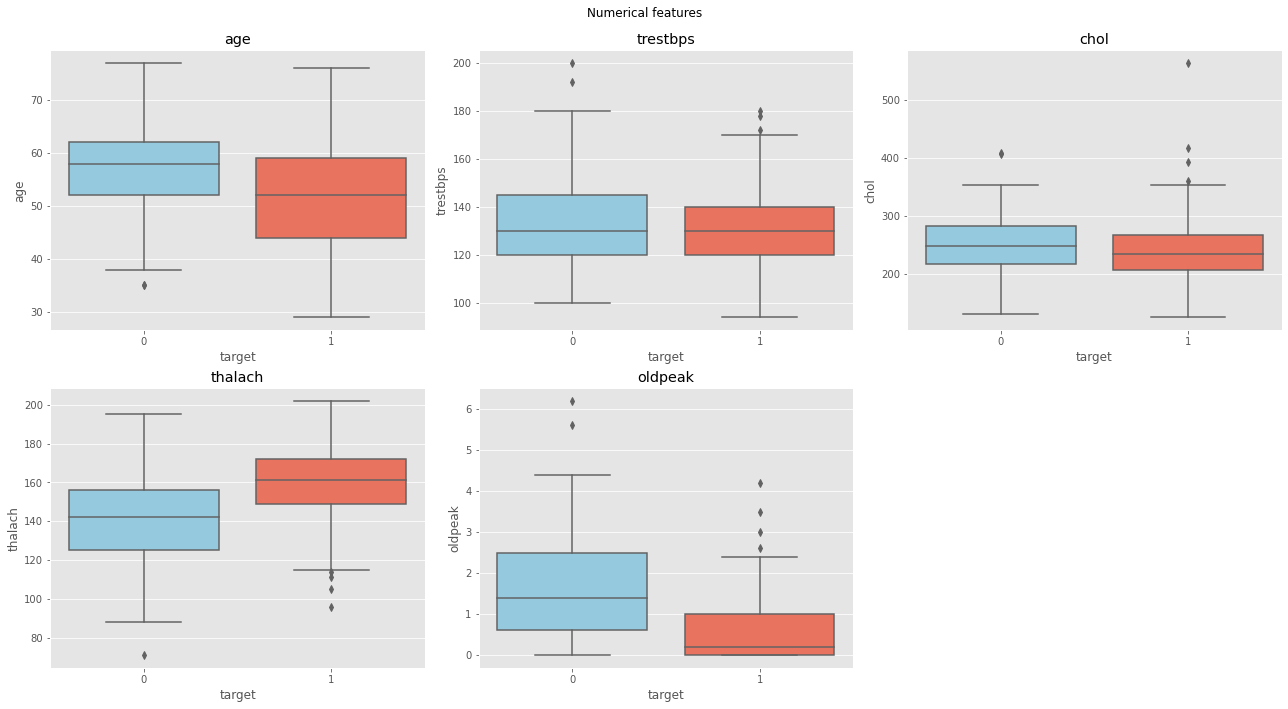

In [10]:
import seaborn as sns
fig2 = plt.figure(figsize=(18,10))

for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    sub = fig2.add_subplot(2, 3, i + 1)
    sns.boxplot(x = "target", y = column, data = data, palette={0: "skyblue", 1: "tomato"}, ax=sub)
    sub.set_title(column)
plt.tight_layout(h_pad=1.0)
plt.subplots_adjust(top=0.92)
fig2.suptitle("Numerical features");

From the previous boxplot charts we could point out that:

* Counterintuitively, there is a slight trend in which younger people are more likely to have heart disease than the elder.
* The resting blood presure shows a slight tendency to be higher on the subjects with no disease. But the data has shown this feature not to be that discriminative.
* As with the resting blood pressure, the serum cholestoral shows a slight tendency to be higher on the subjects with no disease. But the data has shown this feature not to be that discriminative.
* The maximum heart rate achieved is usually higher in subjects with heart disease.
* Low values of ST depression induced by exercise relative to rest seem to be related to the presence of heart disease.

### 4.5. Encoding

Let's check the data type of the features we have:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All of them are in a numeric format and therefore there is no need to do any encoding. (There is a catch here that we will explore at the end of this notebook.)

### 4.6. Check correlation

In [12]:
data_ = data.copy()
correlation = data_.corr()

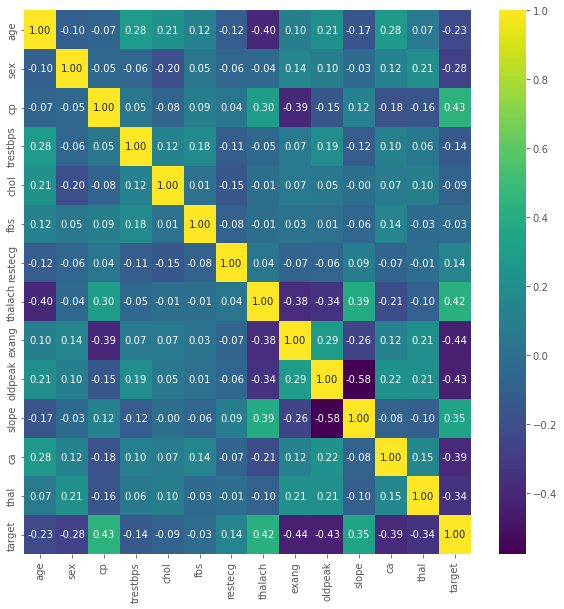

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, cmap="viridis", annot=True, fmt=".2f");

The correlation matrix shows interesting points:
* The heart disease presence in a subject is moderately-positive correlated with features such as chest pain and maximum heart rate achieved, and moderately-negative correlated with features such as exercise-induced angina or low values of ST depression induced by exercise relative to rest.

## 5. Modelling

In [14]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [15]:
data_red = reduce_mem_usage(data, verbose=True)

Mem. usage decreased to  0.01 Mb (83.6% reduction)


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

C:\Users\DANIEL\Desktop\DS_Projects\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [17]:
data_train, data_test = train_test_split(data_red, test_size=0.2, random_state=42)

In [110]:
def f1_macro_cv_score(model, X, y):
    score = cross_val_score(model, X, y, cv=5, scoring="f1")
    return np.mean(score)
    
def cv_f1_evaluation(model, data):
    """
    Prints the cross validation f1 score for a model and a dataset

    Params:
    model: Classifier
    data: Data
    """

    X = data.drop("target", axis=1)
    y = data["target"]
    score = f1_macro_cv_score(model, X, y)
    print(f"CV F1 score: {score:.4f}")    

def f1_evaluation(model, data_train, data_test):
    """
    Prints the f1 score for a model trained on a training set
    evaluated on test set
    Params:
    model: Classifier
    data_train: Data for training
    data_test: Data for the test set
    """

    X_test = data_test.drop("target", axis=1)
    y_test = data_test["target"]

    X_train = data_train.drop("target", axis=1)
    y_train = data_train["target"]
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    test_score = f1_score(y_test, y_pred)
    print(f"F1 score on test set: {test_score:.4f}")   

def plot_auc_roc(model, data_train, data_test):
    """
    Prints the f1 score for a model trained on a training set
    evaluated on test set
    Params:
    model: Classifier
    data_train: Data for training
    data_test: Data for the test set
    """

    X_test = data_test.drop("target", axis=1)
    y_test = data_test["target"]
    fig,ax = plt.subplots(figsize=(8,6))
    X_train = data_train.drop("target", axis=1)
    y_train = data_train["target"]

    model.fit(X_train,y_train)
    plot_roc_curve(model, X_test, y_test, ax=ax)
    ax.set_title("ROC Curve")

def randomized_search(estimator, data, grid, n_iter, cv=5, n_jobs=1):
    X = data.drop("target", axis=1)
    y = data["target"]
    optimized_model = RandomizedSearchCV(estimator = estimator, 
                                         param_distributions = grid, 
                                         n_iter = n_iter, 
                                         cv = cv, 
                                         verbose=1, 
                                         random_state=42, 
                                         n_jobs = n_jobs,
                                         scoring="f1")
    optimized_model.fit(X, y)
    return optimized_model

### 1. Select, Train and Optimize models

* Random Forest Classifier
* Xtreme Gradient Boost Classifier
* Light Gradient Boost Machine Classifier

#### Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

CV F1 score: 0.8322
F1 score on test set: 0.8750


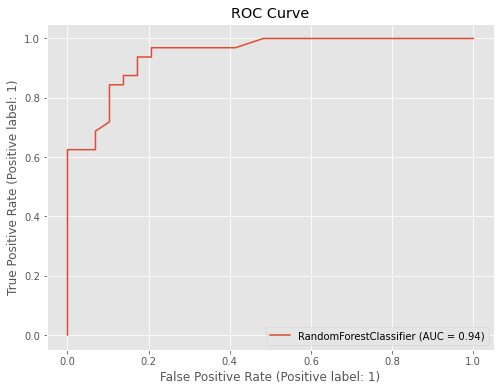

In [ ]:
cv_f1_evaluation(rfc, data_train)
f1_evaluation(rfc, data_train, data_test)
plot_auc_roc(rfc, data_train, data_test)

Hyperparameter tuning

In [55]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}


In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

opt_rfc = randomized_search(rfc, data_train, rf_grid, n_iter=50, n_jobs=-1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
print(opt_rfc.best_params_)

{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}


CV F1 score: 0.8351
F1 score on test set: 0.8923


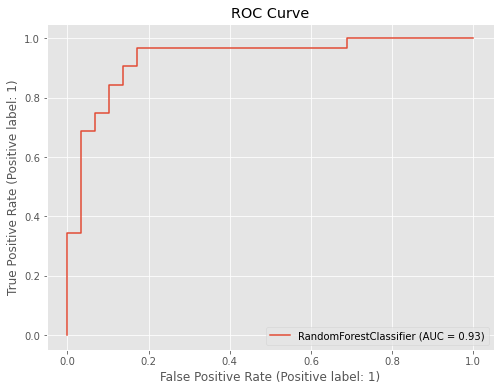

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced", **opt_rfc.best_params_)
cv_f1_evaluation(rfc, data_train)
f1_evaluation(rfc, data_train, data_test)
plot_auc_roc(rfc, data_train, data_test)

#### XGB Classifier

In [97]:
import warnings
warnings.filterwarnings('ignore')
xgbc = XGBClassifier(eval_metric='logloss')

CV F1 score: 0.8110
F1 score on test set: 0.8197


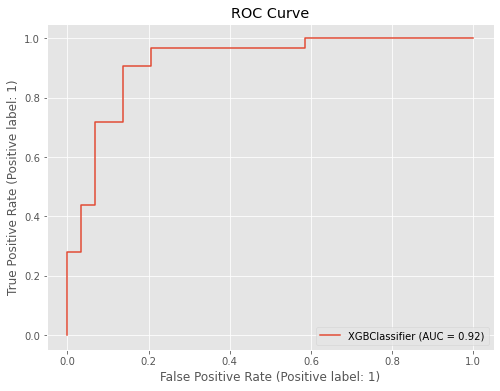

In [98]:
cv_f1_evaluation(xgbc, data_train)
f1_evaluation(xgbc, data_train, data_test)
plot_auc_roc(xgbc, data_train, data_test)

Hyperparameter tuning

In [135]:
xgb_grid = {"colsample_bytree": np.linspace(0.1,0.9,5),
        "gamma": np.logspace(-4,2,10),
        "learning_rate": np.linspace(0.01,1,15),
        "max_depth": np.arange(1,11),
        "min_child_weight": np.logspace(-4,2,10),
        "n_estimators": [3000],
        "reg_alpha": np.linspace(0.1,0.9,5),
        "reg_lambda": np.linspace(0.1,0.9,5),
        "subsample": np.linspace(0.1,0.9,5)
}   

In [136]:
xgbc = XGBClassifier()

opt_xgbc = randomized_search(xgbc, data_train, xgb_grid, n_iter=50, n_jobs=-1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[19:25:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [137]:
print(opt_xgbc.best_params_)

{'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 3000, 'min_child_weight': 0.21544346900318823, 'max_depth': 3, 'learning_rate': 0.8585714285714285, 'gamma': 4.641588833612772, 'colsample_bytree': 0.1}


CV F1 score: 0.8527
F1 score on test set: 0.8571


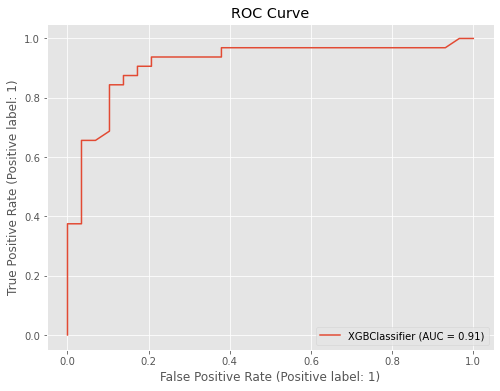

In [138]:
xgbc = XGBClassifier(eval_metric='logloss', **opt_xgbc.best_params_)
cv_f1_evaluation(xgbc, data_train)
f1_evaluation(xgbc, data_train, data_test)
plot_auc_roc(xgbc, data_train, data_test)

#### LGBM Classifier

In [142]:
lgbmc = LGBMClassifier(is_unbalance=True)

CV F1 score: 0.8205
F1 score on test set: 0.8571


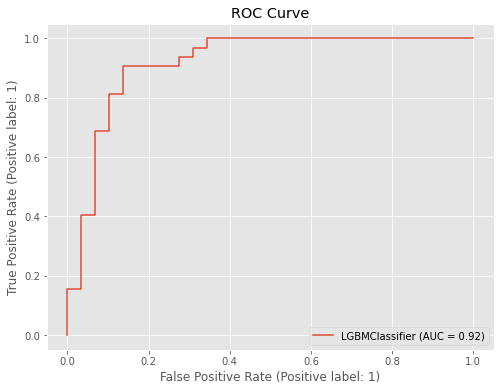

In [143]:
cv_f1_evaluation(lgbmc, data_train)
f1_evaluation(lgbmc, data_train, data_test)
plot_auc_roc(lgbmc, data_train, data_test)

Hyperparameter tuning

In [144]:
lgbm_grid = {"objective": ["binary"],
             "num_leaves": [x**2 for x in np.arange(1,11)],
             "learning_rate": np.linspace(0.001,0.03,15),
             "n_estimators": [3000],
             "max_bin": np.linspace(5,255,15).astype(int),
             "subsample": np.linspace(0.1,1,5),
             "subsample_freq": np.linspace(1,11).astype(int),
             "colsample_bytree": np.linspace(0.1,1,5),
             "min_child_samples": [x**2 for x in np.arange(1,11)],
             "min_child_weight": np.logspace(-4,0,10)
}   

In [145]:
lgbmc = LGBMClassifier(is_unbalance=True, verbose=-1)
opt_lgbmc = randomized_search(lgbmc, data_train, lgbm_grid, n_iter=50, cv=5, n_jobs=1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [146]:
print(opt_lgbmc.best_params_)

{'subsample_freq': 2, 'subsample': 0.325, 'objective': 'binary', 'num_leaves': 4, 'n_estimators': 3000, 'min_child_weight': 0.0002782559402207126, 'min_child_samples': 16, 'max_bin': 58, 'learning_rate': 0.005142857142857143, 'colsample_bytree': 0.775}


CV F1 score: 0.8422
F1 score on test set: 0.8750


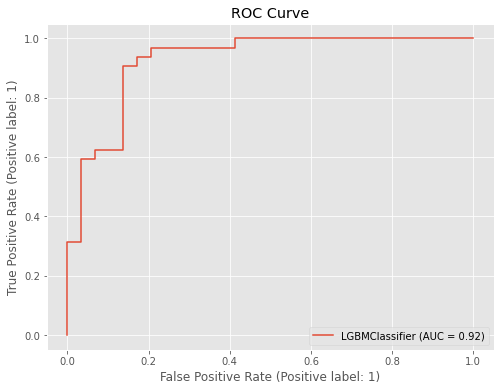

In [147]:
lgbmc = LGBMClassifier(random_state=42, is_unbalance=True, **opt_lgbmc.best_params_)
cv_f1_evaluation(lgbmc, data_train)
f1_evaluation(lgbmc, data_train, data_test)
plot_auc_roc(lgbmc, data_train, data_test)

#### Logistic Regression

In [117]:
logreg = LogisticRegression()

CV F1 score: 0.8449
F1 score on test set: 0.8750


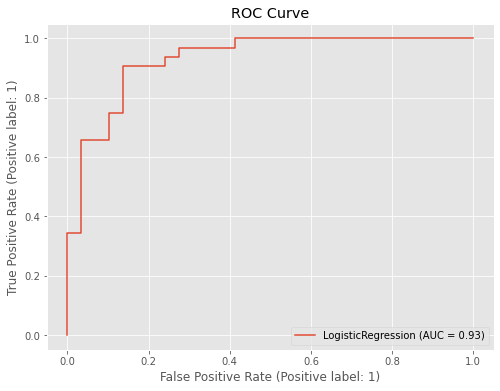

In [118]:
cv_f1_evaluation(logreg, data_train)
f1_evaluation(logreg, data_train, data_test)
plot_auc_roc(logreg, data_train, data_test)

Hyperparameter tuning

In [26]:
log_reg_grid = {"C": np.logspace(-4,4,20),
                "penalty": ["l1", "l2", "elasticnet", "none"]}

In [27]:
log_reg = LogisticRegression()
opt_log_reg = randomized_search(log_reg, data_train, log_reg_grid, n_iter=50, cv=5, n_jobs=1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [28]:
print(opt_log_reg.best_params_)

{'penalty': 'l2', 'C': 0.23357214690901212}


CV F1 score: 0.8410
F1 score on test set: 0.8923


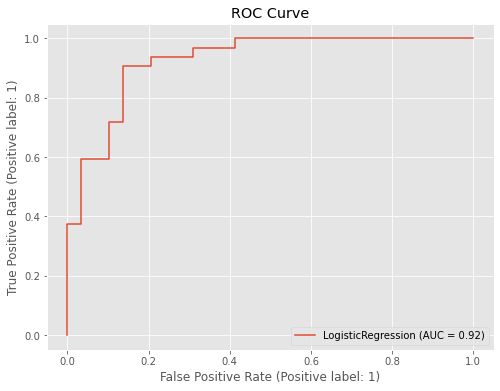

In [29]:
log_reg = LogisticRegression(**opt_log_reg.best_params_)
cv_f1_evaluation(log_reg, data_train)
f1_evaluation(log_reg, data_train, data_test)
plot_auc_roc(log_reg, data_train, data_test)

### Stacking model - vanilla 

We are going to create a stacking model with these as base models:

* Random Forest Classifier
* XGB Classifier
* LGBM Classifier
* Logistic regression classifier

And Logistic regression as metamodel.

All the models will have the default parameters as setup

In [32]:
from sklearn.model_selection import KFold
data_x, data_y, model1_pred, model2_pred, model3_pred, model4_pred = list(), list(), list(), list(), list(), list()
kfold = KFold(n_splits=5, shuffle=True)
X_arr = data_train.drop("target",axis=1).values
y_arr = np.array(data_train["target"])
for train_ix, test_ix in kfold.split(X_arr):
	# get data
	train_X, test_X = X_arr[train_ix], X_arr[test_ix]
	train_y, test_y = y_arr[train_ix], y_arr[test_ix]
	data_x.extend(test_X)
	data_y.extend(test_y)

	# fit and make predictions with rf
	model1 = RandomForestClassifier(random_state=42, class_weight="balanced")
	model1.fit(train_X, train_y)
	pred1 = model1.predict(test_X)
	model1_pred.extend(pred1)

	# fit and make predictions with xgb
	model2 = XGBClassifier(eval_metric="auc")
	model2.fit(train_X, train_y)
	pred2 = model2.predict(test_X)
	model2_pred.extend(pred2)

	# fit and make predictions with lgbm
	model3 = LGBMClassifier(is_unbalance = True)
	model3.fit(train_X, train_y)
	pred3 = model3.predict(test_X)
	model3_pred.extend(pred3)

	# fit and make predictions with logreg
	model4 = LogisticRegression()
	model4.fit(train_X, train_y)
	pred4 = model4.predict(test_X)
	model4_pred.extend(pred4)

In [37]:
def create_meta_dataset(data_x, model1_pred, model2_pred, model3_pred, model4_pred):
	# convert to columns
	model1_pred = np.array(model1_pred).reshape((len(model1_pred), 1))
	model2_pred = np.array(model2_pred).reshape((len(model2_pred), 1))
	model3_pred = np.array(model3_pred).reshape((len(model3_pred), 1))
	model4_pred = np.array(model4_pred).reshape((len(model4_pred), 1))
	# stack as separate columns
	meta_X = np.hstack((data_x, model1_pred, model2_pred, model3_pred, model4_pred))
	return meta_X

In [38]:
# construct meta dataset
meta_X = create_meta_dataset(data_x, model1_pred, model2_pred, model3_pred, model4_pred)

In [40]:
model1 = RandomForestClassifier(random_state=42, class_weight="balanced")
model1.fit(X_arr, y_arr)

model2 = XGBClassifier(eval_metric="auc")
model2.fit(X_arr, y_arr)

model3 = LGBMClassifier(is_unbalance = True)
model3.fit(X_arr, y_arr)

model4 = LogisticRegression()
model4.fit(X_arr, y_arr)

LogisticRegression()

In [41]:
meta_model = LogisticRegression()
meta_model.fit(meta_X, data_y)

LogisticRegression()

In [42]:
def stack_prediction(model1, model2, model3, model4, meta_model, X):
    # make predictions
    model1_pred = model1.predict(X)
    model2_pred = model2.predict(X)
    model3_pred = model3.predict(X)
    model4_pred = model4.predict(X)
    # create input dataset
    meta_X = create_meta_dataset(X, model1_pred, model2_pred, model3_pred, model4_pred)
    # predict
    return meta_model.predict(meta_X)

In [43]:
X_test = data_test.drop("target", axis = 1)
y_test = data_test["target"]

f1_1 = f1_score(y_test, model1.predict(X_test))
f1_2 = f1_score(y_test, model2.predict(X_test))
f1_3 = f1_score(y_test, model3.predict(X_test))
f1_4 = f1_score(y_test, model4.predict(X_test))
print("Model 1 F1")
print(f1_1)
print("Model 2 F1")
print(f1_2)
print("Model 3 F1")
print(f1_3)
print("Model 4 F1")
print(f1_4)

# evaluate meta model on hold out dataset
y_pred_stack = stack_prediction(model1, model2, model3, model4, meta_model, X_test.values)
f1_stack =  f1_score(y_test, y_pred_stack)
print('Meta Model F1')
print(f1_stack)

Model 1 F1
0.875
Model 2 F1
0.8196721311475409
Model 3 F1
0.8571428571428571
Model 4 F1
0.875
Meta Model F1
0.875


### Stacking model - tuned 

We are going to create a stacking model with these as base models:

* Random Forest Classifier
* XGB Classifier
* LGBM Classifier
* Logistic regression classifier

And Logistic regression as metamodel.

All the base models will have the tuned parameters we found previously.

In [64]:
rf_opt_params = {'n_estimators': 2000, 'min_samples_split': 5, 
				 'min_samples_leaf': 1, 'max_features': 'sqrt', 
				 'max_depth': 3, 'bootstrap': True}

xgb_opt_params = {'subsample': 0.9, 'reg_lambda': 0.5, 
				  'reg_alpha': 0.5, 'n_estimators': 3000, 
				  'min_child_weight': 0.21544346900318823, 
				  'max_depth': 3, 'learning_rate': 0.8585714285714285, 
				  'gamma': 4.641588833612772, 'colsample_bytree': 0.1}

lgbm_opt_params = {'subsample_freq': 2, 'subsample': 0.325, 
				   'objective': 'binary', 'num_leaves': 4, 
				   'n_estimators': 3000, 'min_child_weight': 0.0002782559402207126, 
				   'min_child_samples': 16, 'max_bin': 58, 
				   'learning_rate': 0.005142857142857143, 'colsample_bytree': 0.775}
				   
logreg_opt_params = {'penalty': 'l2', 'C': 0.23357214690901212}

In [45]:
from sklearn.model_selection import KFold

data_x, data_y, model1_pred, model2_pred, model3_pred, model4_pred = list(), list(), list(), list(), list(), list()
kfold = KFold(n_splits=5, shuffle=True)
X_arr = data_train.drop("target",axis=1).values
y_arr = np.array(data_train["target"])
for train_ix, test_ix in kfold.split(X_arr):
	# get data
	train_X, test_X = X_arr[train_ix], X_arr[test_ix]
	train_y, test_y = y_arr[train_ix], y_arr[test_ix]
	data_x.extend(test_X)
	data_y.extend(test_y)

	# fit and make predictions with rf
	model1 = RandomForestClassifier(random_state=42, class_weight="balanced", **rf_opt_params)
	model1.fit(train_X, train_y)
	pred1 = model1.predict(test_X)
	model1_pred.extend(pred1)

	# fit and make predictions with xgb
	model2 = XGBClassifier(eval_metric="auc", **xgb_opt_params)
	model2.fit(train_X, train_y)
	pred2 = model2.predict(test_X)
	model2_pred.extend(pred2)

	# fit and make predictions with lgbm
	model3 = LGBMClassifier(is_unbalance = True, **lgbm_opt_params)
	model3.fit(train_X, train_y)
	pred3 = model3.predict(test_X)
	model3_pred.extend(pred3)

	# fit and make predictions with logreg
	model4 = LogisticRegression(**logreg_opt_params)
	model4.fit(train_X, train_y)
	pred4 = model4.predict(test_X)
	model4_pred.extend(pred4)

In [46]:
# construct meta dataset
meta_X = create_meta_dataset(data_x, model1_pred, model2_pred, model3_pred, model4_pred)

In [47]:
model1 = RandomForestClassifier(random_state=42, class_weight="balanced", **rf_opt_params)
model1.fit(X_arr, y_arr)

model2 = XGBClassifier(eval_metric="auc", **xgb_opt_params)
model2.fit(X_arr, y_arr)

model3 = LGBMClassifier(is_unbalance = True, **lgbm_opt_params)
model3.fit(X_arr, y_arr)

model4 = LogisticRegression(**logreg_opt_params)
model4.fit(X_arr, y_arr)

LogisticRegression(C=0.23357214690901212)

In [81]:
meta_model = RandomizedSearchCV(estimator = LogisticRegression(), 
                                param_distributions = log_reg_grid, 
                                n_iter = 50, 
                                cv = 5, 
                                verbose=0, 
                                random_state=42, 
                                n_jobs = 1,
                                scoring="f1")
meta_model.fit(meta_X, data_y);
print(meta_model.best_params_)

{'penalty': 'l2', 'C': 0.23357214690901212}


In [79]:
X_test = data_test.drop("target", axis = 1)
y_test = data_test["target"]

f1_1 = f1_score(y_test, model1.predict(X_test))
f1_2 = f1_score(y_test, model2.predict(X_test))
f1_3 = f1_score(y_test, model3.predict(X_test))
f1_4 = f1_score(y_test, model4.predict(X_test))
print("Model 1 F1")
print(f1_1)
print("Model 2 F1")
print(f1_2)
print("Model 3 F1")
print(f1_3)
print("Model 4 F1")
print(f1_4)

# evaluate meta model on hold out dataset
y_pred_stack = stack_prediction(model1, model2, model3, model4, meta_model, X_test.values)
f1_stack =  f1_score(y_test, y_pred_stack)
print('Meta Model F1')
print(f1_stack)

Model 1 F1
0.8923076923076922
Model 2 F1
0.8571428571428571
Model 3 F1
0.875
Model 4 F1
0.8923076923076922
Meta Model F1
0.8923076923076922


## 6. Results

### 6.1 Model comparison

In [18]:
xgb_results = {"Normal": {"CV_F1": 0.811, "F1": 0.8197, "AUC": 0.92},
               "Optimized": {"CV_F1": 0.8527, "F1": 0.8571, "AUC": 0.91}}

rf_results = {"Normal": {"CV_F1": 0.8322, "F1": 0.8750, "AUC": 0.94},
              "Optimized": {"CV_F1": 0.8351, "F1": 0.8923, "AUC": 0.93}}       

lgbm_results = {"Normal": {"CV_F1": 0.8205, "F1": 0.8571, "AUC": 0.92},
                "Optimized": {"CV_F1": 0.8422, "F1": 0.8750, "AUC": 0.92}}    

logreg_results = {"Normal": {"CV_F1": 0.8449, "F1": 0.8750, "AUC": 0.93},
                  "Optimized": {"CV_F1": 0.8410, "F1": 0.8923, "AUC": 0.92}}

results = {"XGB": xgb_results, 
           "Random Forest": rf_results, 
           "LGMB": lgbm_results, 
           "Logistic Regression": logreg_results}

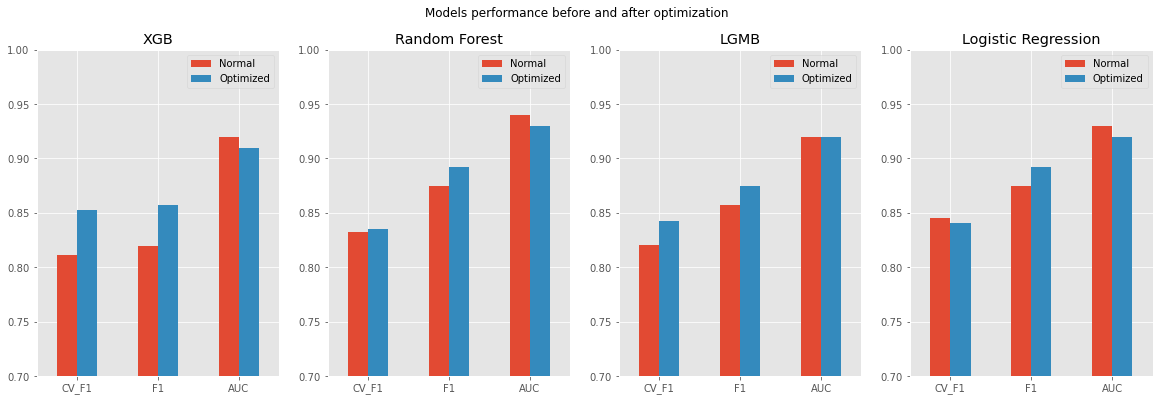

In [19]:
fig = plt.figure(figsize=(20,6))
i = 1
for model_name, model_dict in results.items():
    model_results_df = pd.DataFrame(model_dict)
    sub = fig.add_subplot(1,4,i)
    model_results_df.plot(kind="bar", ax=sub)
    sub.set_title(model_name)
    sub.set_ylim([0.7, 1])
    i += 1
    plt.xticks(rotation = 0)
fig.suptitle("Models performance before and after optimization");

Now let's compare the models side to side

In [41]:
results_rearranged_no_opt = pd.concat([pd.DataFrame(model_results["Normal"], index=[model_name]) for (model_name, model_results) in results.items()], axis = 0)
results_rearranged_no_opt.head()

,CV_F1,F1,AUC
XGB,0.8110,0.8197,0.92
Random Forest,0.8322,0.8750,0.94
LGMB,0.8205,0.8571,0.92
Logistic Regression,0.8449,0.8750,0.93


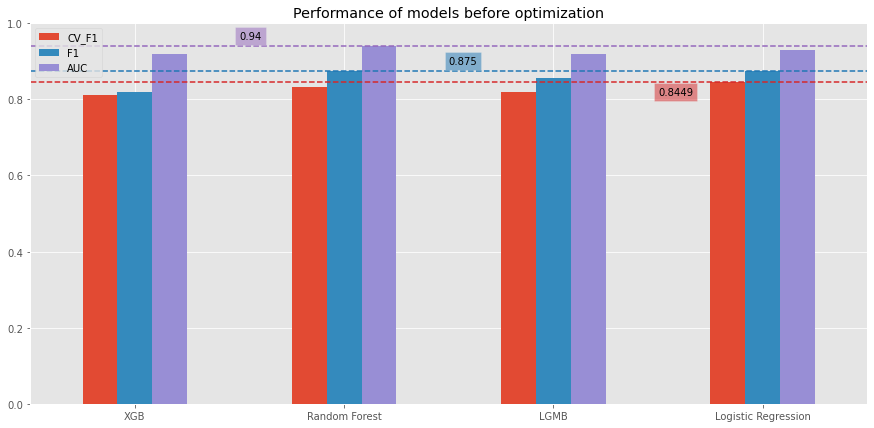

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
results_rearranged_no_opt.plot(kind="bar", ax=ax)

colors = ["tab:red", "tab:blue", "tab:purple"]

for i, col in enumerate(results_rearranged_no_opt.columns):
    max_val = results_rearranged_no_opt[col].max()
    plt.hlines(y = max_val, xmin=-1, xmax=5, linestyles='--', color=colors[i])
    if i== 0:
        plt.text(x=2.5-i, y=max_val*0.96, s=str(max_val), bbox=dict(facecolor=colors[i], alpha=0.5))
    else:
        plt.text(x=2.5-i, y=max_val*1.02, s=str(max_val), bbox=dict(facecolor=colors[i], alpha=0.5))
plt.ylim([0,1])
plt.xticks(rotation = 0)
plt.title("Performance of models before optimization");

In [47]:
results_rearranged_opt = pd.concat([pd.DataFrame(model_results["Optimized"], index=[model_name]) for (model_name, model_results) in results.items()], axis = 0)
results_rearranged_opt.head()

,CV_F1,F1,AUC
XGB,0.8527,0.8571,0.91
Random Forest,0.8351,0.8923,0.93
LGMB,0.8422,0.8750,0.92
Logistic Regression,0.8410,0.8923,0.92


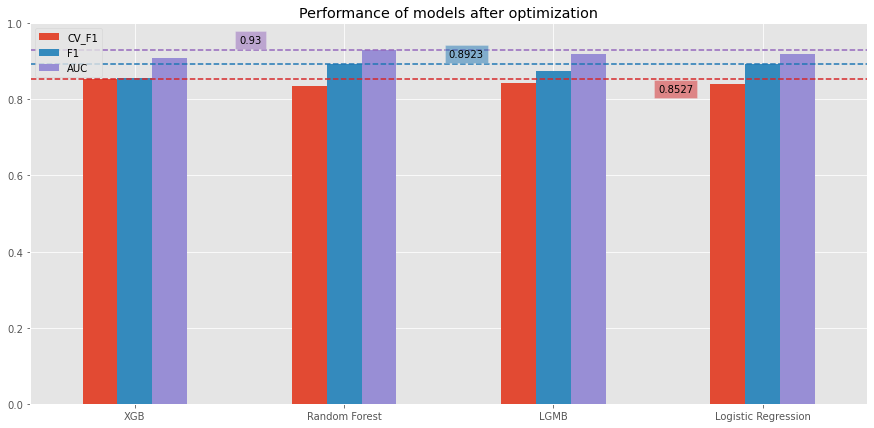

In [48]:
fig, ax = plt.subplots(figsize=(15,7))
results_rearranged_opt.plot(kind="bar", ax=ax)

colors = ["tab:red", "tab:blue", "tab:purple"]

for i, col in enumerate(results_rearranged_opt.columns):
    max_val = results_rearranged_opt[col].max()
    plt.hlines(y = max_val, xmin=-1, xmax=5, linestyles='--', color=colors[i])
    if i== 0:
        plt.text(x=2.5-i, y=max_val*0.96, s=str(max_val), bbox=dict(facecolor=colors[i], alpha=0.5))
    else:
        plt.text(x=2.5-i, y=max_val*1.02, s=str(max_val), bbox=dict(facecolor=colors[i], alpha=0.5))
plt.ylim([0,1])
plt.xticks(rotation = 0)
plt.title("Performance of models after optimization");

We see that the best model is the one based on Random Forest and already optimized. It yielded the highest AUC score together with the highest F1 score on the test set.

We need to ask if having the disease and not being diagnosed is worse than not having the disease and actually being diagnosed with having a heart problem. In that case we could account for other metrics such as recall or precision. Or also a true positive or negative rate. It is also a must ot identify which are the mos important factores to tell if the person has the disease or not based on the best model we just obtained,

In [50]:
X_train = data_train.drop("target", axis = 1)
y_train = data_train["target"]

X_test = data_test.drop("target", axis = 1)
y_test = data_test["target"]

In [52]:
rf_opt_params = {'n_estimators': 2000, 'min_samples_split': 5, 
				 'min_samples_leaf': 1, 'max_features': 'sqrt', 
				 'max_depth': 3, 'bootstrap': True}

rfc = RandomForestClassifier(random_state=42, class_weight="balanced", **rf_opt_params)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



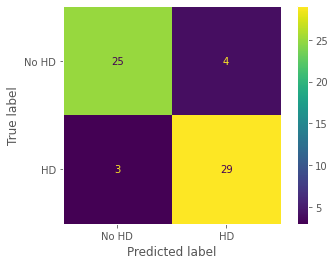

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No HD", "HD"])
disp.plot()
plt.grid(False)
plt.show()

From the confusion matrix above, we can see that the best model predicts correctly 29 out of the 32 subjects (90.6%) that actually have heart disease. Whilst it predicts correctly 25 out of the 29 (86.2%) subjects that do not have heart disease. The model missclassifies 3 subjects that have heart disease as not having heart disease, and 4 subjects that do not have heart disease as having heart disease.

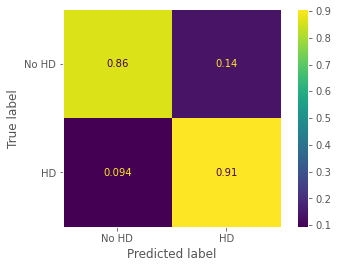

In [60]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No HD", "HD"])
disp.plot()
plt.grid(False)
plt.show()

### 6.2 Feature importance

#### XGB

In [65]:
xgbc = XGBClassifier(eval_metric="auc", **xgb_opt_params)
xgbc.fit(X_train, y_train);

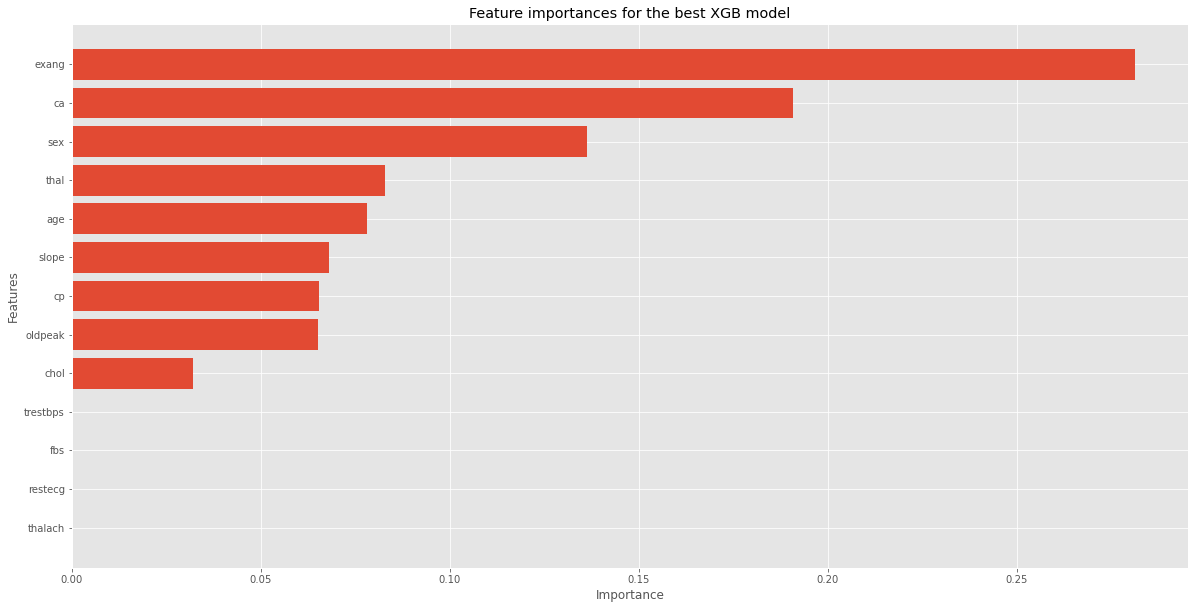

In [66]:
importances_df = pd.DataFrame({"Features":xgbc.get_booster().feature_names, "Importance":xgbc.feature_importances_})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best XGB model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

#### LGBM

In [68]:
lgbmc = LGBMClassifier(is_unbalance = True, **lgbm_opt_params)
lgbmc.fit(X_train, y_train);

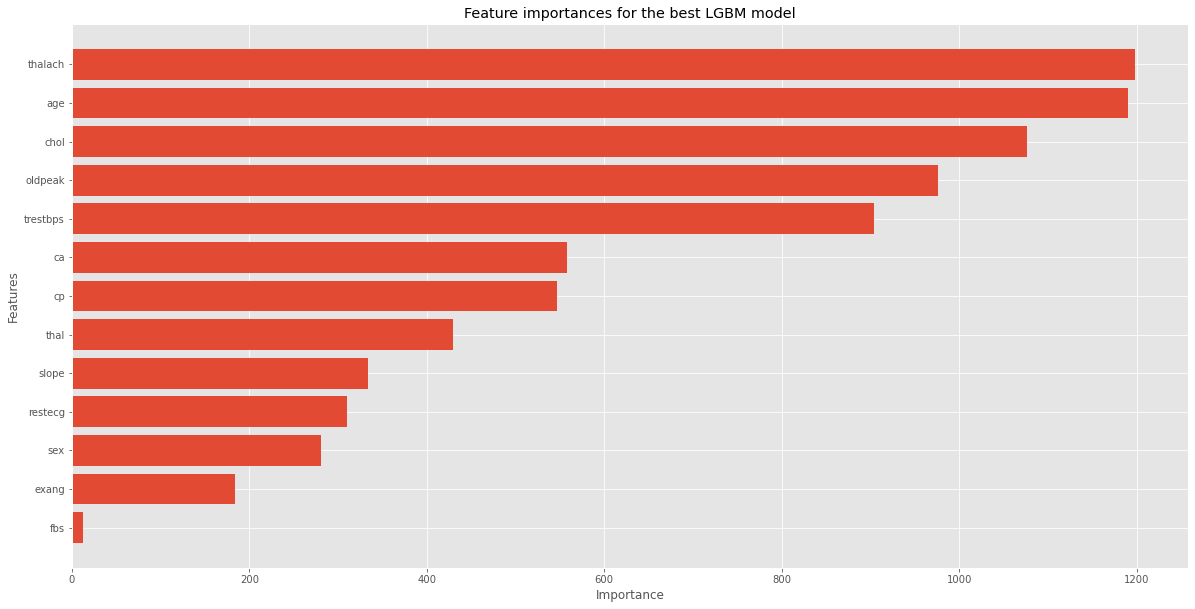

In [69]:
importances_df = pd.DataFrame({"Features":lgbmc.feature_name_, "Importance":lgbmc.feature_importances_})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best LGBM model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

#### Logistic Regression

In [71]:
logreg = LogisticRegression(**logreg_opt_params)
logreg.fit(X_train, y_train);

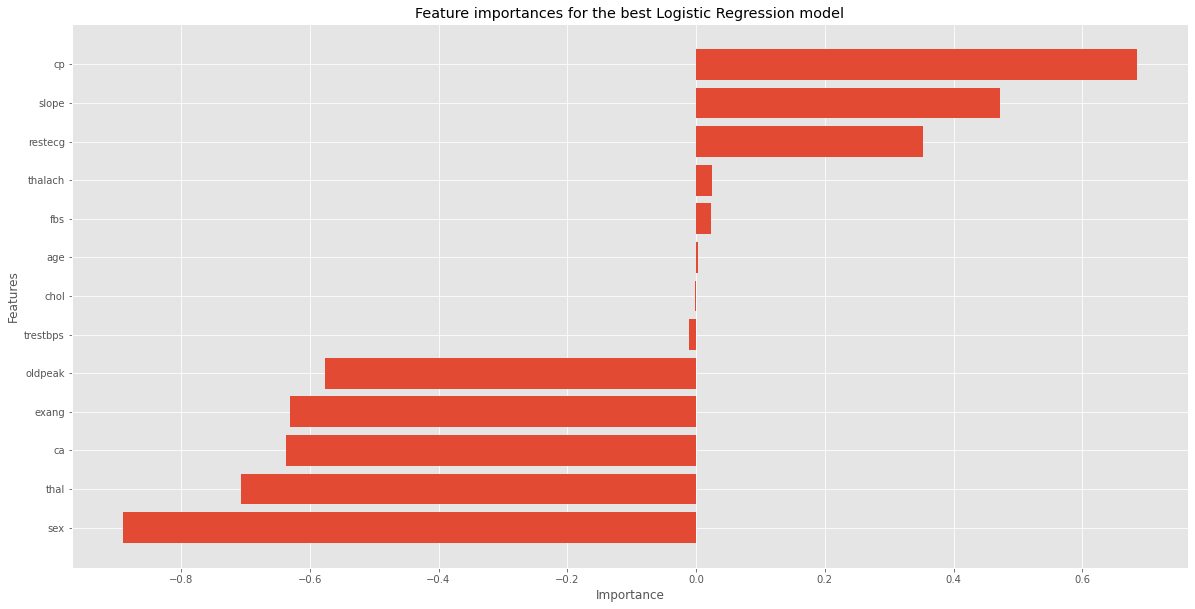

In [76]:
importances_df = pd.DataFrame({"Features":data_train.drop("target",axis=1).columns, "Importance":np.ravel(logreg.coef_)})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best Logistic Regression model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

#### Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced", **rf_opt_params)
# rfc = RandomForestClassifier(random_state=42, class_weight="balanced")
rfc.fit(X_train, y_train);              

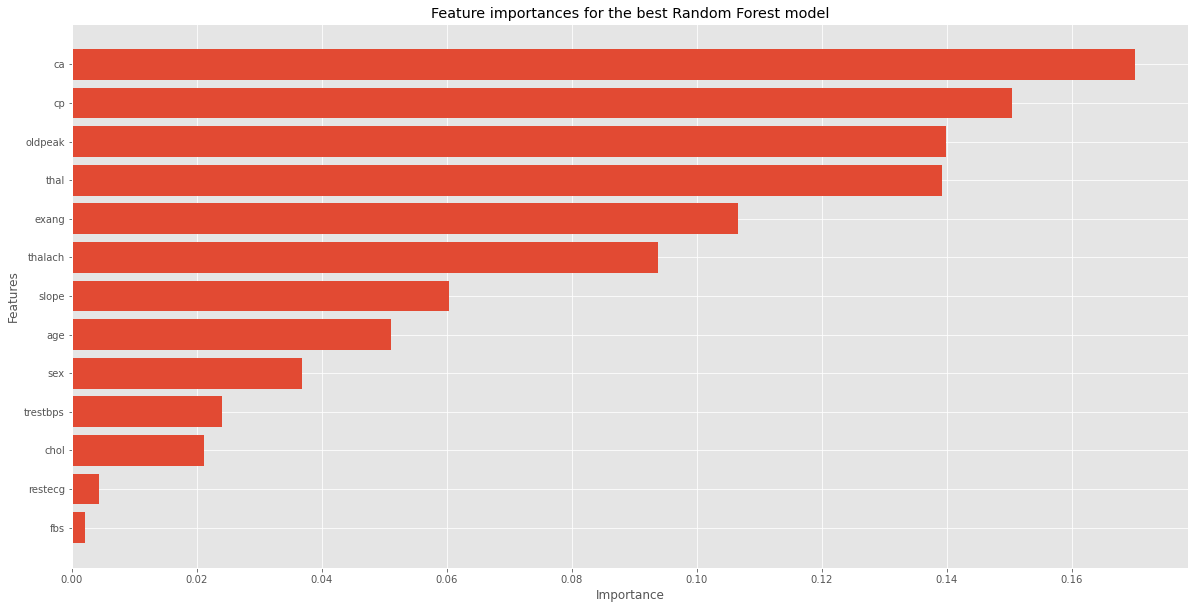

In [ ]:
importances_df = pd.DataFrame({"Features":rfc.feature_names_in_, "Importance":rfc.feature_importances_})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best Random Forest model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

Our model has found the number of major vessels (`ca`) of a subject to be a good discriminator for heart disease, along with other features such as chest pain (`cp`), a qualitative description of the slope of the peak exercise ST segment (`slope`) and Thalium stress result (`thal`). 

## 7. The catch of the encoding

You may notice right now or in the data dictionary at the beginning of this notebook, that although all features are already in a numerical format, some of the categorical features are not ordinal, they are nominal. So, label encoding would not be the right way to represent this data, it would be better to use one-hot encoding. 

These are the columns that are nominal:

1. **cp**: Type of chest pain.
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
 
7. **restecg**: Resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * Can range from mild symptoms to severe problems
        * Signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
11. **slope**: The slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
13. **thal**: Thalium stress result
    * 1: normal
    * 2: fixed defect: used to be defect but ok now
    * 3: reversable defect: no proper blood movement when excercising


Now we create a dictionary to replace the numeric values (product of label encoding) to assign nominal values and then we will apply one-hot encoding

In [93]:
cp_enc = {0: "Typical", 1: "Atypical", 2: "Non-anginal", 3: "Asymptomatic"}
restecg_enc = {0: "Nothing", 1:"ST-T abnormality", 2: "LV hypertrophy"}
slope_enc = {0: "Unslopping", 1: "Flatslopping", 2: "Downslopping"}
thal_enc = {0: "Fixed", 1: "Normal", 2: "Fixed", 3: "Reversable"}

nominal_dict = {"cp": cp_enc, "restecg": restecg_enc, "slope": slope_enc, "thal": thal_enc}

In [94]:
data_oh = data_.copy()
data_oh.replace(nominal_dict, inplace=True)

In [102]:
data_oh = pd.get_dummies(data_oh).drop("target", axis=1)
data_oh["target"] = data_["target"]

In [105]:
data_oh.T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0
ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0
cp_Asymptomatic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Lets check the correlation

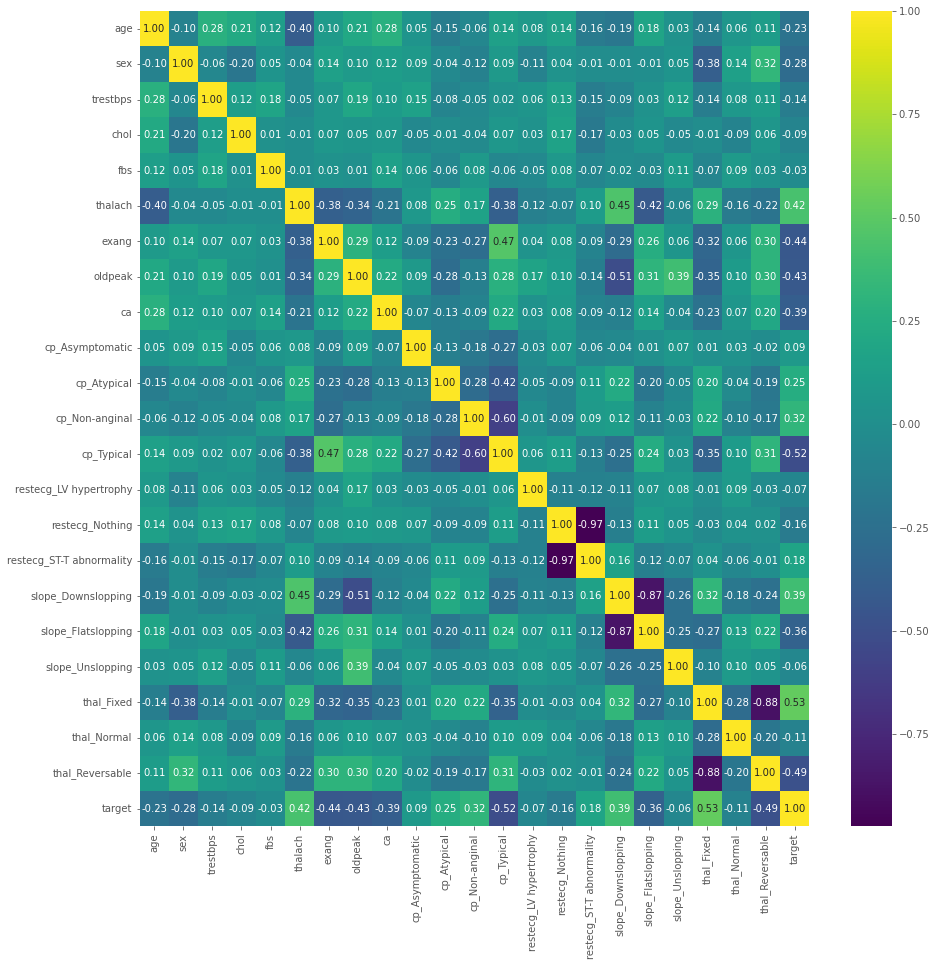

In [104]:
correlation = data_oh.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, cmap="viridis", annot=True, fmt=".2f");

Now lets use a model and lets see if the performance improves

In [106]:
data_train_oh, data_test_oh = train_test_split(data_oh, test_size=0.2, random_state=42)

#### Random Forest

In [116]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

CV F1 score: 0.8332
F1 score on test set: 0.8438


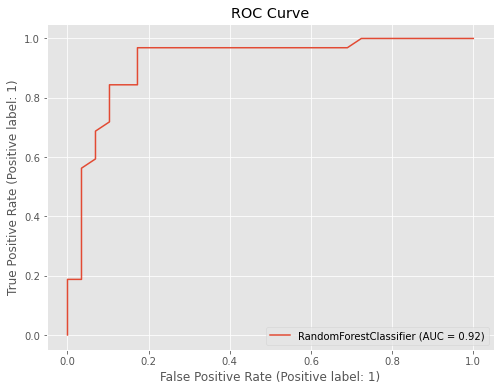

In [117]:
cv_f1_evaluation(rfc, data_train_oh)
f1_evaluation(rfc, data_train_oh, data_test_oh)
plot_auc_roc(rfc, data_train_oh, data_test_oh)

Hyperparameter tuning

In [118]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}


In [119]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

opt_rfc = randomized_search(rfc, data_train_oh, rf_grid, n_iter=50, n_jobs=-1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [120]:
print(opt_rfc.best_params_)

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 67, 'bootstrap': True}


CV F1 score: 0.8428
F1 score on test set: 0.8750


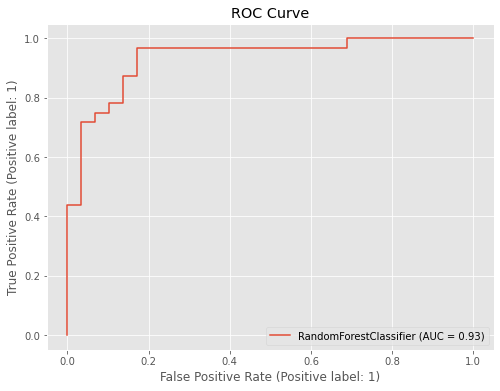

In [121]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced", **opt_rfc.best_params_)
cv_f1_evaluation(rfc, data_train_oh)
f1_evaluation(rfc, data_train_oh, data_test_oh)
plot_auc_roc(rfc, data_train_oh, data_test_oh)

#### XGB Classifier

In [122]:
import warnings
warnings.filterwarnings('ignore')
xgbc = XGBClassifier(eval_metric='logloss')

CV F1 score: 0.8123
F1 score on test set: 0.8525


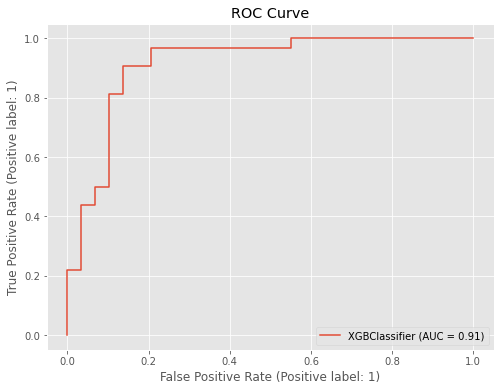

In [123]:
cv_f1_evaluation(xgbc, data_train_oh)
f1_evaluation(xgbc, data_train_oh, data_test_oh)
plot_auc_roc(xgbc, data_train_oh, data_test_oh)

Hyperparameter tuning

In [124]:
xgb_grid = {"colsample_bytree": np.linspace(0.1,0.9,5),
        "gamma": np.logspace(-4,2,10),
        "learning_rate": np.linspace(0.01,1,15),
        "max_depth": np.arange(1,11),
        "min_child_weight": np.logspace(-4,2,10),
        "n_estimators": [3000],
        "reg_alpha": np.linspace(0.1,0.9,5),
        "reg_lambda": np.linspace(0.1,0.9,5),
        "subsample": np.linspace(0.1,0.9,5)
}   

In [125]:
xgbc = XGBClassifier()

opt_xgbc = randomized_search(xgbc, data_train_oh, xgb_grid, n_iter=50, n_jobs=-1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[15:30:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [128]:
print(opt_xgbc.best_params_)

{'subsample': 0.9, 'reg_lambda': 0.30000000000000004, 'reg_alpha': 0.7000000000000001, 'n_estimators': 3000, 'min_child_weight': 0.21544346900318823, 'max_depth': 1, 'learning_rate': 0.505, 'gamma': 4.641588833612772, 'colsample_bytree': 0.30000000000000004}


CV F1 score: 0.8553
F1 score on test set: 0.8438


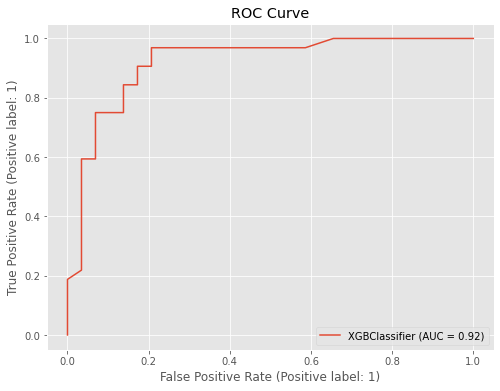

In [127]:
xgbc = XGBClassifier(eval_metric='logloss', **opt_xgbc.best_params_)
cv_f1_evaluation(xgbc, data_train_oh)
f1_evaluation(xgbc, data_train_oh, data_test_oh)
plot_auc_roc(xgbc, data_train_oh, data_test_oh)

#### LGBM Classifier

In [129]:
lgbmc = LGBMClassifier(is_unbalance=True)

CV F1 score: 0.8308
F1 score on test set: 0.8571


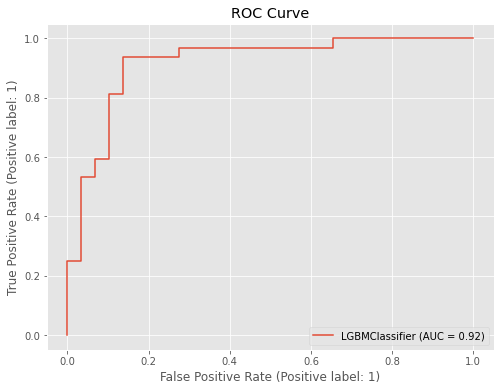

In [130]:
cv_f1_evaluation(lgbmc, data_train_oh)
f1_evaluation(lgbmc, data_train_oh, data_test_oh)
plot_auc_roc(lgbmc, data_train_oh, data_test_oh)

Hyperparameter tuning

In [131]:
lgbm_grid = {"objective": ["binary"],
             "num_leaves": [x**2 for x in np.arange(1,11)],
             "learning_rate": np.linspace(0.001,0.03,15),
             "n_estimators": [3000],
             "max_bin": np.linspace(5,255,15).astype(int),
             "subsample": np.linspace(0.1,1,5),
             "subsample_freq": np.linspace(1,11).astype(int),
             "colsample_bytree": np.linspace(0.1,1,5),
             "min_child_samples": [x**2 for x in np.arange(1,11)],
             "min_child_weight": np.logspace(-4,0,10)
}   

In [132]:
lgbmc = LGBMClassifier(is_unbalance=True, verbose=-1)
opt_lgbmc = randomized_search(lgbmc, data_train_oh, lgbm_grid, n_iter=50, cv=5, n_jobs=1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [133]:
print(opt_lgbmc.best_params_)

{'subsample_freq': 8, 'subsample': 0.775, 'objective': 'binary', 'num_leaves': 36, 'n_estimators': 3000, 'min_child_weight': 0.005994842503189409, 'min_child_samples': 36, 'max_bin': 76, 'learning_rate': 0.0030714285714285713, 'colsample_bytree': 0.325}


CV F1 score: 0.8580
F1 score on test set: 0.8750


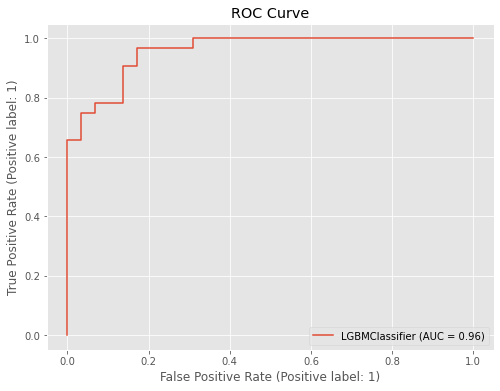

In [134]:
lgbmc = LGBMClassifier(random_state=42, is_unbalance=True, **opt_lgbmc.best_params_)
cv_f1_evaluation(lgbmc, data_train_oh)
f1_evaluation(lgbmc, data_train_oh, data_test_oh)
plot_auc_roc(lgbmc, data_train_oh, data_test_oh)

#### Logistic Regression

In [135]:
logreg = LogisticRegression()

CV F1 score: 0.8399
F1 score on test set: 0.8852


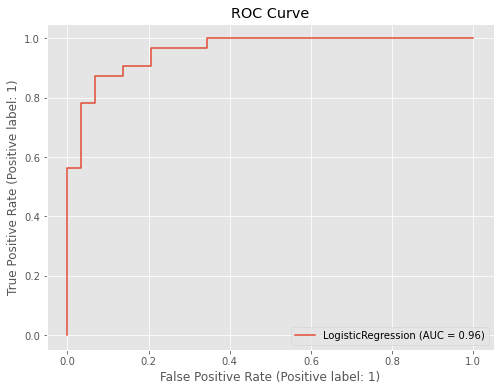

In [136]:
cv_f1_evaluation(logreg, data_train_oh)
f1_evaluation(logreg, data_train_oh, data_test_oh)
plot_auc_roc(logreg, data_train_oh, data_test_oh)

Hyperparameter tuning

In [137]:
log_reg_grid = {"C": np.logspace(-4,4,20),
                "penalty": ["l1", "l2", "elasticnet", "none"]}

In [138]:
log_reg = LogisticRegression()
opt_log_reg = randomized_search(log_reg, data_train_oh, log_reg_grid, n_iter=50, cv=5, n_jobs=1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [139]:
print(opt_log_reg.best_params_)

{'penalty': 'l2', 'C': 0.23357214690901212}


CV F1 score: 0.8487
F1 score on test set: 0.8889


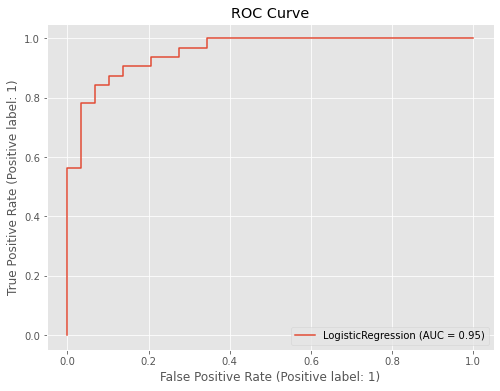

In [140]:
log_reg = LogisticRegression(**opt_log_reg.best_params_)
cv_f1_evaluation(log_reg, data_train_oh)
f1_evaluation(log_reg, data_train_oh, data_test_oh)
plot_auc_roc(log_reg, data_train_oh, data_test_oh)

In [142]:
log_reg.fit(data_train_oh.drop("target", axis=1), data_train_oh["target"])
y_pred = log_reg.predict(data_test_oh.drop("target", axis=1))

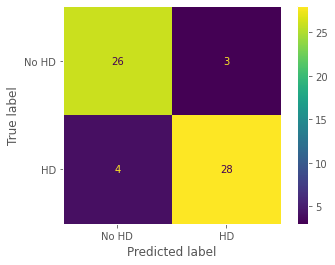

In [143]:
cm = confusion_matrix(data_test_oh["target"], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No HD", "HD"])
disp.plot()
plt.grid(False)
plt.show()

The performance of the models did not improve significantly. But it is interesting to see the overall increase in the AUC for most of the models with the one-hot encoded data. An increase in the AUC could be interpreted as that the model is more confident in its predictions.

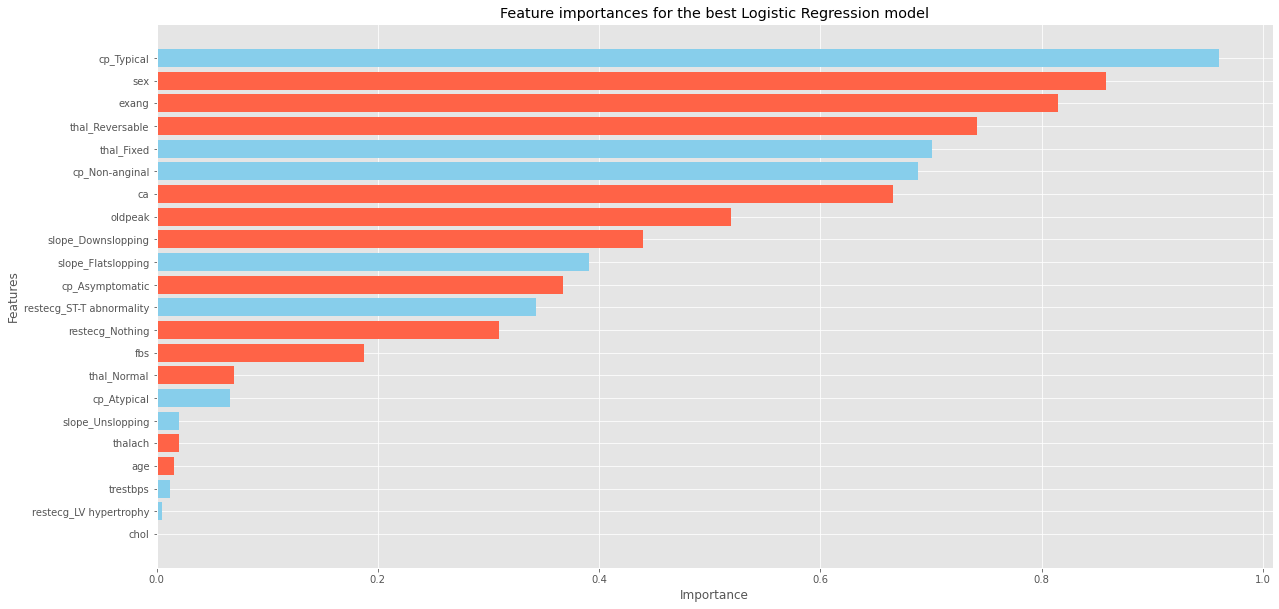

In [155]:
importances_df = pd.DataFrame({"Features":data_train_oh.drop("target",axis=1).columns, "Importance":abs(np.ravel(logreg.coef_))})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

color_sign = ["skyblue" if (val > 0) else "tomato" for val in np.ravel(logreg.coef_)]

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n], color=color_sign )
ax.set(title="Feature importances for the best Logistic Regression model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

The chart above shows the importance the tuned logistic regression model gives to the features of the one-hot encoded dataset. The bars in blue represent the negative importance, whilst the red bars represent the positive ones. The positive importances will contribute the model to push a prediction towards 1. For example, if we have a high value for `oldpeak` it will contribute more to the model predicting 1 (having heart disease), than a low value of `oldpeak` would do. The opposite happens with the features of negative importance (blue). For example, a low value of `trestbps` will contribute more to the model predicting 0 (not having heart disease), than a low value of `trestbps` would do.

## 8. Conclusions

1. The EDA allowed us to make several interesting observations about the distribution of the data, such as that subjects that do not present a typical angina during the exam are 3 times more likely to have heart disease that those who do, or that women are 1.5 times more likely to have heart disease than men.
2. We should ask the stake-holders of this project if it is less desirable to diagnose with heart disease someone who does not have the disease (false positive) or to diagnose with no heart disease someone who actually have the disease (false negative). With this information we could minimize the false positives or false negatives based on probability thresholds.
4. Although the data may come in a numeric format it is important to understand whether or not the categorical features are ordinal or nominal, and based on this apply the correct encoding. For this particular project correcting the encoding of the data did not show a significant improvement, but in other scenarios it could have a great impact. Therefore it should be a good practice to check and correctly encode the features.